<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/UN_decade_banner.png' align='right' width='100%'/>

<a href="../../../../Index.ipynb" target="_blank"><< Index</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2025 European Union <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT), Tom jackson (EUMETSAT)

<html>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://user.eumetsat.int/data/themes/marine"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fapplications%2Focean-case-studies/HEAD?labpath=Case_studies%2FUNOD%2FCh01%2FSargassum%2FSargassum_AFAI.ipynb"><img src="https://mybinder.org/badge_logo.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/ocean-case-studies/Case_studies/UNOD/Ch01/Sargassum/Sargassum_AFAI.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://code.insula.destine.eu/hub/"><img src="https://img.shields.io/badge/launch-DestinE-f43fd3.svg"></a></div></div>
</html>

<div class="alert alert-block alert-success">
<h3>Ocean colour applications</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>

This notebook has the following prerequisites:
- **<a href="https://my.wekeo.eu/user-registration" target="_blank">A WEkEO account</a>** to work with Copernicus Sentinel-3 OLCI marine data from EUMETSAT Data Store
    
There are no prerequisite notebooks for this module, but you may wish to look at the following notebooks on using Sentinel-3 OLCI data; <br>
- **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-olci" target="_blank">Learn OLCI (EUMETSAT Gitlab)</a>**

</div>
<hr>

# Monitoring Sargassum in the Caribbean
<font color="#138D75">**UN Ocean Decade Challenge 1: Understand and beat marine pollution**</font>


### Data used

| Dataset | EUMETSAT collection ID | EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description | Copernicus Marine<br>Data Store product ID | Copernicus Marine<br>product description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| Sentinel-3 OLCI level-1b full resolution | EO:EUM:DAT:0409 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:OL_1_EFR___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_1_EFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_1_EFR___" target="_blank">Description</a> | - | - |
| Sentinel-3 OLCI level-2 full resolution | EO:EUM:DAT:0407 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:OL_2_WFR___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_2_WFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_2_WFR___" target="_blank">Description</a> | - | - |

### Learning outcomes

At the end of this notebook you will know how to ;

* access Sentinel-3 OLCI ocean colour data via WEkEO
* process Sentinel-3 OLCI data sets with the ESA SNAP package using the WEkEO `eocanvas` serverless function architecture

### Outline

<figure>
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/Sargasses_au_large_de_Tintamare-_RNN_de_Saint_Martin.jpg/2880px-Sargasses_au_large_de_Tintamare-_RNN_de_Saint_Martin.jpg" width='40%'/>
  <img src="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies/-/raw/main/img/Sargassum_caribbean.png" width='52.75%'/>
  <figcaption><a id='figure1'>Figure 1: Sargassum floating of the coast of St Martin (left). False colour RGB image of sargassum in the Southern Caribbean from Copernicus Sentinel-3B Ocean and Land Colour Instruments (OLCI) (right). (Credit: Left: VELY Michel, CC BY-SA 4.0. Right: EUMETSAT). </figcaption>
</figure>
    
So far 2025 is already a record breaking year for Sargassum. Over 37.5 million tons are reported to have accumulated in the Atlantic this season, based on satellite observations such as those from Copernicus Sentinel-3 Ocean and Land Colour Instrument (OLCI, Figure 1). The dense patches of floating, brown seaweed have already washed up on beaches in Puerto Rico and Mexico. 

Whilst the seaweed is naturally occurring and important for biodiversity, the dense blooms appear to be increasing, and causing problems for people and businesses and government  in the region. The accumulations blanket beaches (Figure 1), impacting tourism and poses a hazard to coastal infrastructure. The blooms have also blocked power station water intakes, leading to power outages. When the blooms decompose they can also cause human health impacts from bacterial contamination, poor air quality, and heavy metal accumulation. This has lead to numerous impacts from the reorganisation of holidays and weddings, through to school closures. Impacts are not just felt by humans, coral reefs can also be blanketed by the seaweed, and other animals can become trapped and beached when they reach land.

Various drivers have been implicated as potential causes of the observed increase in sargassum over recent years including warming seas, changing winds, rains and currents, and increased pollution entering the sea and fertilising blooms of the giant algae. Recent work has also identified a link between shifts in the North Atlantic Oscillation and the input of nutrients as a result in changes in mixing of shallow and deep ocean waters.

Knowing where the sargassum is vital to planning any kind of intervention. Satellite data is one of the only tools that can possibly support such an approach for a process that begins far out at sea. Data from Copernicus Sentinel-3 OLCI is particularly critical in this context, as it provides daily, relatively high resolution data over the global ocean, with optical characteristics that can identify the floating algae. The red edge bands on OLCI are particularly useful in this context and form the basis of algorithms used to classify images and quantify sargassum presence. Combining these data with information on ocean currents can provide risk maps and forecasts to coordinate regional responses. Services like the CARICOOS[1] (Caribbean Integrated Coastal Ocean Observing System) sargassum tracker and SeSaM[2] (Seasonal Sargassum Monitoring and Forecasting) service offer information derived from Copernicus Sentinel-3 OLCI combined with other data to provide near real time, short term and inundation forecasts.

While there are a number of approaches for quantifying macroalgae biomass from ocean colour sensors, this Jupyter Notebook focusses on the calculation of the Alternative Floating Algal Index (AFAI). This approach, originally developed for MODIS[3], but now adapted for multi-sensor approaches that include OLCI[4] is suitable for monitoring sargassum and is used by the CARICOOS service. AFAI requires us to first pre-process our OLCI products so that we have Rayleigh corrected reflectances. To do this, we will use the WEkEO <a href="https://help.wekeo.eu/en/articles/9515753-what-is-the-harmonized-data-access-hda-api">HDA</a> and <a href="https://help.wekeo.eu/en/articles/9925111-wekeo-eocanvas-serverless-functions-for-copernicus-data">eocanvas</a> services to access the data and call the ESA SNAP package remotely, as a serverless function. As noted in the "Prerequisites" box above, you will need to sign up for a free WEkEO account to use these services.

The AFAI calculation we perform here, and the resulting figure, can be seen in the associated case study published on the <a href="https://user.eumetsat.int/search-view?sort=startDate%20desc&facets=%7B%22contentTypes%22:%5B%22Resources%7CCase%20studies%22%5D,%22theme%22:%5B%22Marine%22,%22Marine%7CMaritime%20safety%22,%22Marine%7COcean%20biogeochemistry%22,%22Marine%7COcean%20dynamics%22,%22Marine%7CWater%20quality%22%5D%7D">EUMETSAT User Portal</a> . However, you are free to adapt it for other regions and time periods. If you wish to adapt the notebook for use with other sensors, please take care to make sure you select the correct bands and update the AFAI calculation as required.

#### References

1. <a href="https://www.caricoos.org/sargassum">CARICOOS</a>; the Caribbean Integrated Coastal Ocean Observing System viewer
2. <a href="https://www.spaceclimateobservatory.org/sesam">SESAM</a>; Seasonal Sargassum Monitoring and Forecasting service and <A href="https://sargassum-viewer.lab.dive.edito.eu/">EDITO digital twin</a> viewer
3. <a href="https://www.sciencedirect.com/science/article/abs/pii/S0034425716301833" target="_blank">Wang, M., & Hu, C. (2016). Mapping and quantifying Sargassum distribution and coverage in the Central West Atlantic using MODIS observations. Remote sensing of environment, 183, 350-367.</a>
4. <a href="https://www.sciencedirect.com/science/article/abs/pii/S0034425716301833" target="_blank">Sun, Y., Wang, M., Liu, M., Li, Z. B., Chen, Z., & Huang, B. (2024). Continuous Sargassum monitoring across the Caribbean Sea and Central Atlantic using multi-sensor satellite observations. Remote Sensing of Environment, 309, 114223.</a>

<div class="alert alert-info" role="alert">

## <a id='TOCTOP'></a>Contents

</div>

 1. Setting up our analysis
 1. Selecting our data using the WEkEO harmonised data access (HDA) adaptor
 1. Processing Copernicus Sentinel-3 OLCI data using WEkEO `eocanvas` serverless functions
 1. Calculating and plotting the alternative floating algal index (AFAI)
 1. Conclusions

<hr>

<div class="alert alert-info" role="alert">

## Setting up our analysis

</div>

In this section we will set up all the parameters we need to run our notebook. We will begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies/-/blob/main/README.md?ref_type=heads" target="_blank">README</a>**.

**Important: If you are running on WEkEO, you should ensure that you have selected the "*wekeolab*" environment/ipykernel using the dropdown menu on the top right of the screen.**

In [1]:
import eumartools                      # a EUMETSAT library that support working with Sentinel-3 products
import os                              # a library that allows us access to basic operating system commands
import glob                            # a library that helps us search for files
import datetime                        # a library that allows us to work with dates and times
import xarray as xr                    # a library that helps us work efficiently with multi-dimensional arrays
import matplotlib.pyplot as plt        # a library the provides plotting capability
from shapely import geometry           # a library that supports the creation of shape objects, like polygons
import numpy as np                     # a library that lets us work with arrays; we import this with a new name "np"
from pathlib import Path               # a library that helps construct system path objects
import getpass                         # a library to help us enter passwords
import hda                             # a library that supports WEkEO harmonised data access 
import cartopy                         # a library that supports mapping and projection
import cartopy.crs as ccrs             # a library that supports mapping and projection
import warnings                        # a library that supports managing warning messages
warnings.filterwarnings("ignore")

Lets also now add the eocanvas package to our environent. The cell below will install `eocanvas` if it is not already in the Python environment.

In [2]:
try:
    from eocanvas.api import Input, Config, ConfigOption # the eocanvas api
except:
    %pip install eocanvas
    from eocanvas.api import Input, Config, ConfigOption # the eocanvas api

from eocanvas.snap.graph import Graph                # the part of the eocanvas library for working with SNAP graphs
from eocanvas.snap import Operator                   # the part of the eocanvas library for defining SNAP graphs nodes
from eocanvas.processes import SnapProcess           # the part of the eocanvas library for defining SNAP processes

All of our dependencies are now installed.

In the next section of the notebook we will define all the parameters that we need to select, process and download level-1b (L1B) and level-2 OLCI (L2) products, which we use to calculate and flag our sargassum biomass. To find our data of interest, we need to define:

* our region of interest (ROI), which we will need as a well known text (WKT) format polygon
* the time period over which we want to find data

Lets set these parameters, starting with a square box that we can turn into a WKT polygon for searching.

*Note: our default example is for the Southern Caribbean sea in mid-2025, but you can adapt this for other regions and times as you like. Bear in mind that larger temporal or spatial windows will return more products when we search for data.*

In [3]:
# defining our bounding box (W, S, E, N) and WKT polygon
bbox = [-63.25, 11.80, -61.1, 14.67]
polygon = [[bbox[0], bbox[1]], [bbox[2], bbox[1]], [bbox[2], bbox[3]], [bbox[0], bbox[3]], [bbox[0], bbox[1]]]
WKT = geometry.Polygon([[p[0], p[1]] for p in polygon])

# defining our search times
start_L2 = datetime.datetime(2025, 4, 14, 14, 5, 11)
end_L2 = datetime.datetime(2025, 4, 14, 14, 8, 11)

Now let us set our `collectionID`s, the references for each collection in the WEkEO catalog (for example; `EO:EUM:DAT:SENTINEL-3:OL_1_EFR___`). These can be found in the <a href="https://wekeo.copernicus.eu/data?view=catalogue">WEkEO Data Catalog</a>. We will store these in a Python dictionary, as follows...

In [4]:
data_sources = {
               "L1B" : {"collectionID" : "EO:EUM:DAT:SENTINEL-3:OL_1_EFR___"}, # this is the OLCI level-1b collection ID, which contains top of atmosphere radiances
               "L2"  : {"collectionID" : "EO:EUM:DAT:SENTINEL-3:OL_2_WFR___"}, # this is the OLCI level-2 collection ID, which contains atmospherically corrected reflectances
               }

Now, lets set a timeliness parameter so that we can select on non-time critical (NT) scenes, which are of a higher quality than near real time data. You can change this to "NR" if you want to work with the most recently available products. We will also define our satellites, to include only Sentinel-3B in this example.

In [5]:
timeliness = "NT"
satellite = "Sentinel-3B"

Finally, lets define a download directory, where we can download our products to and set a switch that controls if we should download and process new data, or use existing data.

In [6]:
download_dir = os.path.join(os.getcwd(), "products")
os.makedirs(download_dir, exist_ok=True)

# set a switch to process and download new data if True, or use existing data if False
process_L1_L2_data = True

Now we have set our parameters, we can proceed with our workflow. If you wish to adapt the notebook to focus on a different region or time, you can do so by updating the settings above.

<div class="alert alert-warning" role="alert">

## Defining functions

</div>

#### Defining a quick function to supporting plotting

Before we move on to our analysis, we are going to define a quick function for use later on. We define functions when we have some code that we want to use repeatedly later on. In this section we define a quick functions that we will use to aid plotting. You don't need to worry about how this function works, and so it is hidden by default. You can click on the "+1 cell hidden" box below if you want to see it.

In [7]:
def embellish_plot(m):
    """Quick function to embellish plots with gridlines and labels

    Args:
        m (axis): the axis to plot into
    Returns:
        None
    """
    # Embellish with gridlines
    m.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='k', facecolor='#546d51', linewidth=0.5), zorder=500)
    g1 = m.gridlines(draw_labels = True, linestyle='--', linewidth=0.5, zorder=1000)
    g1.top_labels = g1.right_labels = False
    g1.xlabel_style = g1.ylabel_style = {'color': '0.5'}

<div class="alert alert-info" role="alert">

## Selecting our data using the WEkEO harmonised data access (HDA) adaptor

</div>

<div class="alert alert-block alert-success">

### Accessing data using the WEkEO HDA adaptor

Downloading from WEkEO harmonised data access (HDA) API is facilitated by a data access client. If you are currently working on the WEkEO JupyterHub, this client will already be installed. Otherwise, if you have followed the installation guidelines in the yml file provided with this repository, you will also have the client installed. If not, you are welcome to view the <a href="https://github.com/ecmwf/hda" target="_blank">source code</a> for more information and further instructions.

In order to allow us to download data using the WEkEO HDA API, we need to provide our credentials. To do this, we need to create a file called `.hdarc` in our home directory. For most computer systems the home directory can be found at the path \user\username, /users/username, or /home/username depending on your operating system. In this file we need to add the following information exactly as follows;

`user:<your_user_name>`<br>
`password:<your_password>`

You must replace `<your_user_name>` and `<your_password>` with the information from your WEkEO account (if you don't have one yet, please register at <a href="https://www.wekeo.eu/" target="_blank">https://www.wekeo.eu/</a>. Once you have entered these credentials in the file, the `hda` client will automatically read in the credentials from the file when you use it. 

The cell below will set up the required authentication file for you once you have your details ready.

*Note: take care not to share your user name and password!*

</div>

In [8]:
# set credentials file
wekeo_credentials_file = Path(Path.home() / '.hdarc')

if not os.path.exists(wekeo_credentials_file):
    # creating authentication file
    user_name = input('Enter your user name: ')
    user_pword = getpass.getpass('Enter your password: ')
    try:
        os.makedirs(os.path.dirname(wekeo_credentials_file), exist_ok=True)
        with open(wekeo_credentials_file, "w") as f:
            f.write(f'password: {user_pword}\nuser: {user_name}')
    except:
        pass

Now that we have our credentials set up we can set-up and instance of the HDA client, as below;

In [9]:
c = hda.Client()

Now, we can loop through our data sources dictionary, using the search parameters we defined above to find the matching products

In [10]:
for data_source in data_sources:

    query = {
            "dataset_id": data_sources[data_source]["collectionID"],
            "dtstart"   : start_L2.strftime("%Y-%m-%dT%H:%M:%S.000Z"),
            "dtend"     : end_L2.strftime("%Y-%m-%dT%H:%M:%S.000Z"),
            "timeliness": timeliness,
            "bbox"      : bbox,
            "sat"       : satellite
            }
    
    results = c.search(query)
    data_sources[data_source]["results"] = results
    data_sources[data_source]["urls"] = results.get_download_urls()
    data_sources[data_source]["product_names"] = [results.results[i]["id"] for i in range(len(results))]

    print(f"Found: {len(results)} products for {data_sources[data_source]['collectionID']}")

Found: 1 products for EO:EUM:DAT:SENTINEL-3:OL_1_EFR___
Found: 1 products for EO:EUM:DAT:SENTINEL-3:OL_2_WFR___


If everything went as expected, we should have found 2 products; a single level-1b products and a single level-2 product. Now we can move on to process them.

<div class="alert alert-info" role="alert">

## Processing Copernicus Sentinel-3 OLCI data using WEkEO `eocanvas` serverless functions

</div>

Should we wish, we could now directly download the entirety of the level-1b and level-2 products that come from our search, using the following command:

`data_sources["L1B"]["results"].download(download_dir=download_dir)`

or

`data_sources["L2"]["results"].download(download_dir=download_dir)`

However, OLCI level-1b and level-2 scenes are typically quite large, ~900 Mb and ~500 Mb in size, respectively. Furthermore, these are not yet fully processed for our needs and so it would be more efficient to process these results remotely, subsequently downloading only the final, much smaller products. This is what we will do.

We are going to process our products using a <a href="https://step.esa.int/main/toolboxes/snap/">ESA SNAP</a> software package. Access to this package is managed through the WEkEO `eocanvas` python library, which allows us to run SNAP as a serverless function. However, we need to provide instructions to SNAP in order to define the processes we want to perform. We achieve this by providing `eocanvas` an XML format "Graph" that SNAP can ingest using its command-line based Graph Processing Tool (GPT). Lets look at these graphs and then set-up our `eocanvas` process.

We have included two example graphs in the `SNAP_graphs` folder, one for L1B processing, which we will focus on, and one for L2 processing. Lets load these into our `data_sources` dictionary using the `Graph` method from `eocanvas`.

In [11]:
data_sources["L1B"]["graph"] = Graph.from_uri(os.path.join(os.getcwd(), "SNAP_graphs", "SNAP_GPT_graph_OLCI_L1B_subset_Rrc.xml"))
data_sources["L2"]["graph"] = Graph.from_uri(os.path.join(os.getcwd(), "SNAP_graphs", "SNAP_GPT_graph_OLCI_L2_subset_flags.xml"))

Lets take a look at one of the graphs...

In [12]:
# show it
data_sources["L1B"]["graph"].nice_view()

We can see that a number of steps are defined, each contained within a single "Node". We have following nodes:

* Read - where we read our input product
* Subset - where we subset out input product
* Rayleigh Correction - where we Rayleigh correct our product
* Write - where we output for final product

There are two important things to note. Firstly, the Read and Write nodes have placeholder string in them (`$img1` and `$output`), which eocanvas will use to connect the graph to our input Sentinel-3 OLCI products, as supplied by the HDA, and our output products for eventual download. Secondly, we have updated the `geoRegion` field in the subset node with the WKT we generated above.

Our graph is now ready, so lets launch it! We are launching each job in sequence and each will take about 30 seconds to complete. After each process is done, we will download the data to the download directory and rename them to something we can work with.

In [13]:
if process_L1_L2_data:
    output_files = []
    for data_source in data_sources:
        for url, product_name in zip(data_sources[data_source]["urls"], data_sources[data_source]["product_names"]):
    
            inputs = Input(key="img1", url=url)
            config = Config(key="img1", options=ConfigOption(uncompress=True, sub_path="xfdumanifest.xml"))
            process = SnapProcess(snap_graph=data_sources[data_source]["graph"], eo_config=config, eo_input=inputs)
            process.prepare_inputs()
    
            job = process.submit()
            process.run(job, download_dir=download_dir)
        
            # rename output  
            downloaded_file = os.path.join(download_dir, os.path.basename(job.results[0].title))
            output_file = os.path.join(download_dir, product_name.replace(".SEN3", "_eocanvas_processed.nc"))
            output_files.append(output_file)
            os.rename(downloaded_file, output_file)
else:
    output_files = sorted(glob.glob(os.path.join(download_dir,'*')))

Job: cf473153-9947-5c2f-97fc-16a805f206d4 - Status: accepted at 2025-06-18T14:45:41.010442
Job: cf473153-9947-5c2f-97fc-16a805f206d4 - Status: running at 2025-06-18T14:45:51.214171
Job: cf473153-9947-5c2f-97fc-16a805f206d4 - Status: running at 2025-06-18T14:46:02.419500
Job: cf473153-9947-5c2f-97fc-16a805f206d4 - Status: running at 2025-06-18T14:46:14.792163
Job: cf473153-9947-5c2f-97fc-16a805f206d4 - Status: running at 2025-06-18T14:46:28.276207
Job: cf473153-9947-5c2f-97fc-16a805f206d4 - Status: running at 2025-06-18T14:46:43.267164
Job: cf473153-9947-5c2f-97fc-16a805f206d4 - Status: running at 2025-06-18T14:47:00.430084
Job: cf473153-9947-5c2f-97fc-16a805f206d4 - Status: running at 2025-06-18T14:47:18.563606
Job: cf473153-9947-5c2f-97fc-16a805f206d4 - Status: running at 2025-06-18T14:47:38.312393
Job: cf473153-9947-5c2f-97fc-16a805f206d4 - Status: running at 2025-06-18T14:48:00.976598
Job: de60fc93-e9b1-54d8-8dde-e438de1ae9a0 - Status: accepted at 2025-06-18T14:48:29.132835
Job: de6

You should now be able to look in the "products" folder in the same directory as this notebook and find two processed scenes. Our `eocanvas` processing is complete.

<div class="alert alert-info" role="alert">

## Calculating and plotting the alternatve floating algal index (AFAI)

</div>

Floating macroalgae, such as Sargassum, display distinct spectral characteristics. These characteristics allow us to quantify its abundance, but require specific algorithms to do so. The alternative floating algal index (AFAI), originally developed for MODIS (<a href="https://www.sciencedirect.com/science/article/abs/pii/S0034425716301833" target="_blank">Wang and Hu, 2016</a>) but later adapted for a multi-sensor approach that includes OLCI (<a href="https://www.sciencedirect.com/science/article/abs/pii/S0034425716301833" target="_blank">Sun et al., 2024</a>), is one such approach. AFAI, examines the red-edge, Rayleigh corrected, reflectance of floating vegetation, and exploits the high NIR values associated with floating vegetation. It can be applied to our OLCI data as follows;

<div class="alert alert-block alert-warning">
$AFAI = R_{rc, NIR1} - R_{rc, NIR1}'$
    
$R_{rc, NIR1}' = R_{rc, RED} + (R_{rc, NIR2} - R_{rc, RED}) \times (\lambda_{NIR1} - \lambda_{RED}) / (\lambda_{NIR2} - \lambda_{RED})$
</div>

For OLCI, this translates to the following bands;

<div class="alert alert-block alert-warning">
$AFAI = R_{rc, BAND12} - (R_{rc, BAND08} + (R_{rc, BAND17} - R_{rc, BAND08}) \times (754 - 665) / (865 - 665))$
<br><br>

*...where $R_{rc}$ represents the Rayleigh corrected reflectance for the corresponding band. Note that other sensors use different band sets.*
</div>


Lets start working with our data, starting with opening the Rayleigh corrected level-1b product.

In [14]:
ds = xr.open_dataset(output_files[0])

We have everything we need inside this product to calculate AFAI. So lets apply our algorithm...

In [15]:
AFAI = ds["rBRR_12"] - (ds["rBRR_08"] + (ds["rBRR_17"] - ds["rBRR_08"]) * (754 - 665)/(865 - 665))    

AFAI has been calculated for every pixel in the scene, inclusing those that do not contain valid ocean pixels. The reason we processed the level-2 products is so that we can calculate a suitable quality mask from the fully atmospherically corrected product. In the next cell, we will calculate a mask from the pixels flagged as land and cloud (including anything ambigious around them).

In [16]:
mask = eumartools.flag_mask(output_files[1],
                     'WQSF_lsb', ['LAND', 'CLOUD', 'CLOUD_AMBIGUOUS', 'CLOUD_MARGIN']).astype(float)
mask[mask == 1.0] = np.nan
mask[np.isfinite(mask)] = 1.0

Finally, let's apply the mask to our AFAI product, and plot it...

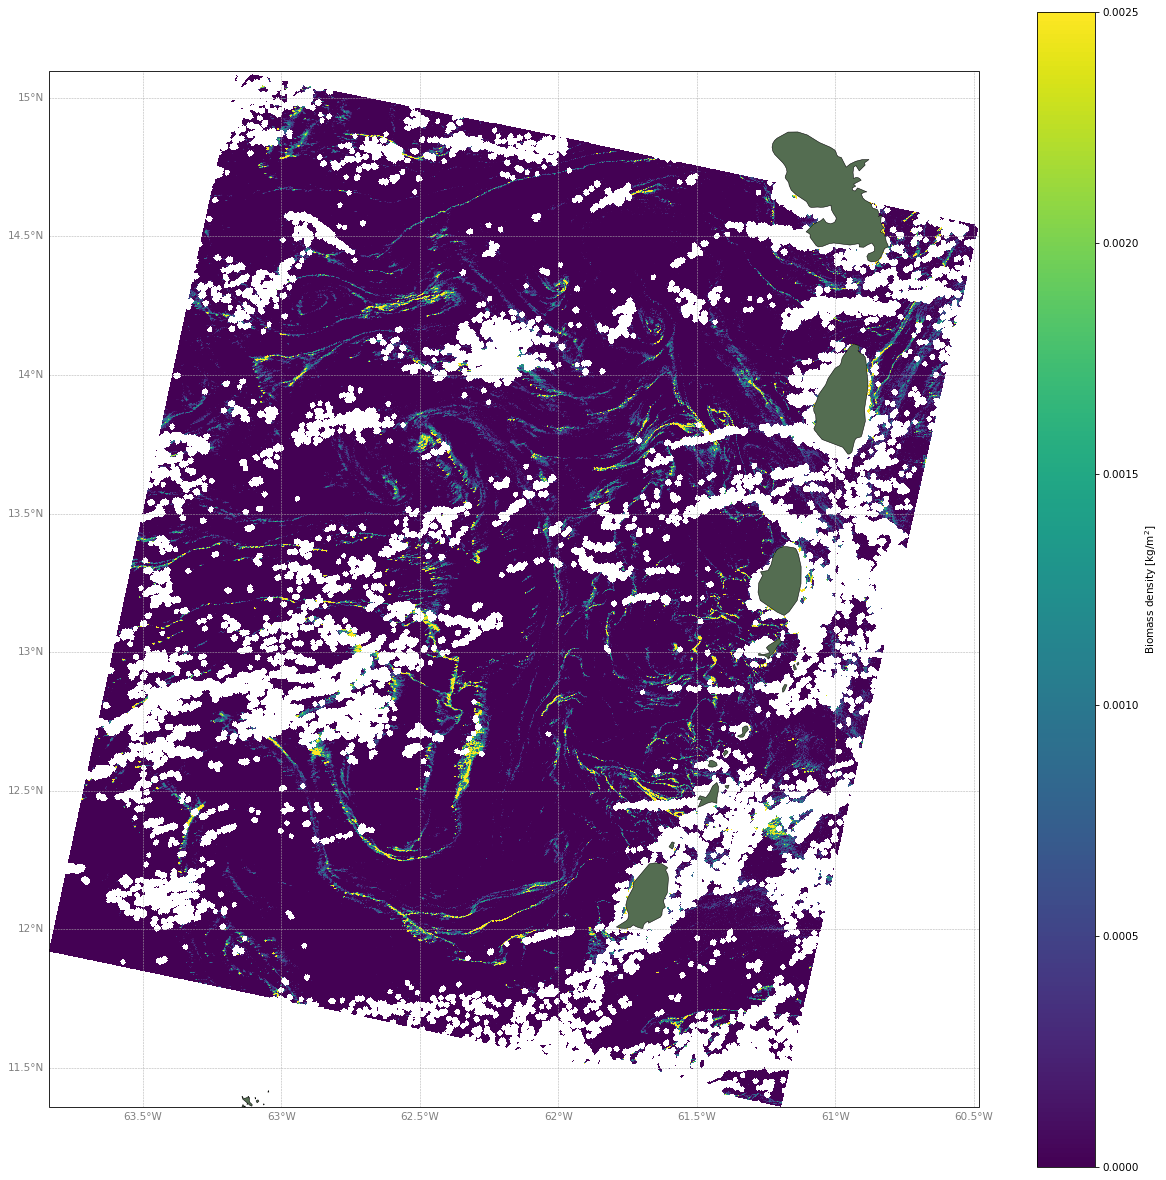

In [18]:
fig, m = plt.subplots(1, 1, figsize=(20, 20), dpi=75, subplot_kw={"projection": ccrs.PlateCarree()})
p1 = m.pcolormesh(ds["lon"], ds["lat"], AFAI*mask, vmin=0.0, vmax=0.0025, transform=ccrs.PlateCarree())
embellish_plot(m)
plt.colorbar(p1, label='Biomass density [kg/m$^{2}$]')
plt.savefig("Figure3.png")

Our resulting masked AFAI products clearly shows the Sargassum floating to the west of the outer islands of the Southern Caribbean. As Sargassum floats above the surface it is subject to wind shear and often tends to form either clumbs or long strands that are stretched by either wind of the prevailing currents. Concentrations peak around 0.0025 kg/m$^{2}$. While this may not appear high, in aggregate this can equate to millions of tons across the Atlantic basin.

<div class="alert alert-info" role="alert">

## Conclusions

</div>

In this notebook we have seen that satellite data is capable of providing a detailed view of sargassum bloom events. Thanks to their spectral bands, modern sensors such as the OLCI sensors aboard the Sentinel-3 satellites can be exploited to detect these blooms, provided we adopt suitable approaches such as the alternative floating algal index. OLCI data is exploited by multiple services, such as CARICOOS and SESAM, to provide operational monitoring of sargassum blooms allowing for improved marine and coastal management around major bloom events.

### Suggested next steps

To further develop your skills and knowledge, and expand the application of this notebook you could try:
* Adapting the time and or region of interest to eexplore other areas. Puerto Rico, Mexico, and most of the Southern Caribbean was widely affected throughout 2023 and 2025.

<hr>
<a href="../../../Index.ipynb" target="_blank"><< Index</a>
<hr>

<a href="https://gitlab.eumetsat.int/eumetlab/ocean" target="_blank">View on GitLab</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>